In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cvxpy as cp
import json
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter

In [20]:
#definitions
amino_acids = ['alanine', 
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine',]
essential = ['histidine', 'isoleucine', 'leucine', 'lysine', 
                         'methionine', 'phenylalanine', 'threonine', 'tryptophan', 'valine']
macro_minerals = ['sodium', 'potassium', 'calcium', 'phosphorous','magnesium']
trace_minerals = ['copper','irom','manganese','zink','selenium']
vitamins = ['choline', 'riboflavin','thiamin','niacin','pantothenic_acid',
            'folate','folic_acid','vitamin_a','vitamin_b12','vitamin_b6',
            'vitamin_c','vitamin_d','vitamin_e','vitamin_k']
fatty_acids = ['saturated_fatty_acids','monounsaturated_fatty_acids',
               'polyunsaturated_fatty_acids']
summary = ['protein','carbohydrate','sugars','total_fat','saturated_fat','fiber']
other = ['cholesterol']

In [21]:
df = pd.read_csv('../data/nutrition_clean_subset.csv')
names = pd.read_csv('../data/food_names_subset.csv')
names = names['name']
name_to_idx = {v: k for k, v in names.to_dict().items()}
columns_to_idx = {v: i for i, v in enumerate(df.columns)}

with open('../data/units.json') as json_file:
    units = json.load(json_file)

## Constraints

In [22]:
lower = {'calories': 1900,
 'total_fat': 50,
 'saturated_fat': 10,
 'cholesterol': 50,
 'sodium': 1500,
 'choline': 550,
 'folate': 400,
#  'folic_acid': 400,
 'niacin': 16,
 'pantothenic_acid': 5,
 'riboflavin': 1.3,
 'thiamin': 1.2,
 'vitamin_a': 3000,
 'vitamin_a_rae': ' mcg',
 'carotene_alpha': ' mcg',
 'carotene_beta': ' mcg',
 'cryptoxanthin_beta': ' mcg',
 'lutein_zeaxanthin': ' mcg',
 'vitamin_b12': 2.4,
 'vitamin_b6': 1.3,
 'vitamin_c': 90,
 'vitamin_d': 600,
 'vitamin_e': 15,
 'vitamin_k': 120,
 'calcium': 1300,
 'copper': 0.9,
 'irom': 8,
 'magnesium': 400,
 'manganese': 2.3,
 'phosphorous': 700,
 'potassium': 4700,
 'selenium': 55,
 'zink': 11,
 'protein': 70,
 'alanine': ' g',
 'arginine': ' g',
 'aspartic_acid': ' g',
 'cystine': 0.287,
 'glutamic_acid': ' g',
 'glycine': ' g',
 'histidine': 0.7,
 'hydroxyproline': 'g',
 'isoleucine': 1.4,
 'leucine': 2.73,
 'lysine': 2.1,
 'methionine': 0.728,
 'phenylalanine': 0.875,
 'proline': ' g',
 'serine': ' g',
 'threonine': 1.05,
 'tryptophan': 0.28,
 'tyrosine': 0.875,
 'valine': 1.82,
 'carbohydrate': 130, #130
 'fiber': 38,
 'sugars': 'g',
 'fructose': 'g',
 'galactose': 'g',
 'glucose': 'g',
 'lactose': 'g',
 'maltose': 'g',
 'sucrose': 'g',
 'fat': 'g', #78
 'saturated_fatty_acids': ' g',
 'monounsaturated_fatty_acids': ' g',
 'polyunsaturated_fatty_acids': 17,
 'alcohol': 'g',
 'ash': 'g',
 'caffeine': 'g',
 'theobromine': 'g',
 'water': 100} #500

upper = {'calories': 2500,
 'total_fat': 120,
 'saturated_fat': 25,
 'cholesterol': 250,
 'sodium': 3000,
 'choline': 2500,
 'folate': 900,
#  'folic_acid': 900,
 'niacin': 30,
 'pantothenic_acid': 100,
 'riboflavin': 500,
 'thiamin': 200,
 'vitamin_a': 8000,
 'vitamin_a_rae': ' mcg',
 'carotene_alpha': ' mcg',
 'carotene_beta': ' mcg',
 'cryptoxanthin_beta': ' mcg',
 'lutein_zeaxanthin': ' mcg',
 'vitamin_b12': 8,
 'vitamin_b6': 4,
 'vitamin_c': 1000,
 'vitamin_d': 5000,
 'vitamin_e': 500,
 'vitamin_k': 500,
 'calcium': 2000,
 'copper': 7,
 'irom': 35,
 'magnesium': 500,
 'manganese': 7,
 'phosphorous': 3500,
 'potassium': 7000,
 'selenium': 300,
 'zink': 35,
 'protein': 100,
 'alanine': ' g',
 'arginine': ' g',
 'aspartic_acid': ' g',
 'cystine': ' g',
 'glutamic_acid': ' g',
 'glycine': ' g',
 'histidine': ' g',
 'hydroxyproline': 'g',
 'isoleucine': ' g',
 'leucine': ' g',
 'lysine': ' g',
 'methionine': ' g',
 'phenylalanine': ' g',
 'proline': ' g',
 'serine': ' g',
 'threonine': ' g',
 'tryptophan': ' g',
 'tyrosine': ' g',
 'valine': ' g',
 'carbohydrate': 400, #300
 'fiber': 55,
 'sugars': 40,
 'fructose': ' g',
 'galactose': 'g',
 'glucose': ' g',
 'lactose': ' g',
 'maltose': ' g',
 'sucrose': ' g',
 'fat': 'g', #120
 'saturated_fatty_acids': ' g',
 'monounsaturated_fatty_acids': ' g',
 'polyunsaturated_fatty_acids': 30,
 'alcohol': 5,
 'ash': ' g',
 'caffeine': ' mg',
 'theobromine': ' mg',
 'water': 2000}

In [23]:
constraints = {k_up: (v_low, v_up) for (k_up, v_up), (_, v_low) in zip(upper.items(), lower.items()) 
 if not (isinstance(v_low, str) and isinstance(v_up, str))}

In [24]:
for k,v in constraints.items():
    upper = v[1]
    lower = v[0]
    if isinstance(v[1],str):
        upper = 'inf'
    if isinstance(v[0],str):
        lower = 0
    print(f"{lower} < {k} ({units[k].replace(' ','')}) < {upper}")

1900 < calories (kcal) < 2500
50 < total_fat (g) < 120
10 < saturated_fat (g) < 25
50 < cholesterol (mg) < 250
1500 < sodium (mg) < 3000
550 < choline (mg) < 2500
400 < folate (mcg) < 900
16 < niacin (mg) < 30
5 < pantothenic_acid (mg) < 100
1.3 < riboflavin (mg) < 500
1.2 < thiamin (mg) < 200
3000 < vitamin_a (IU) < 8000
2.4 < vitamin_b12 (mcg) < 8
1.3 < vitamin_b6 (mg) < 4
90 < vitamin_c (mg) < 1000
600 < vitamin_d (IU) < 5000
15 < vitamin_e (mg) < 500
120 < vitamin_k (mcg) < 500
1300 < calcium (mg) < 2000
0.9 < copper (mg) < 7
8 < irom (mg) < 35
400 < magnesium (mg) < 500
2.3 < manganese (mg) < 7
700 < phosphorous (mg) < 3500
4700 < potassium (mg) < 7000
55 < selenium (mcg) < 300
11 < zink (mg) < 35
70 < protein (g) < 100
0.287 < cystine (g) < inf
0.7 < histidine (g) < inf
1.4 < isoleucine (g) < inf
2.73 < leucine (g) < inf
2.1 < lysine (g) < inf
0.728 < methionine (g) < inf
0.875 < phenylalanine (g) < inf
1.05 < threonine (g) < inf
0.28 < tryptophan (g) < inf
0.875 < tyrosine (g) <

Minimize $|\mathbf{x}|_1$

subject to $b_1 \leq A\mathbf{x} \leq b_2$

where $\mathbf{x} \in \mathcal{R}_+$

$\mathbf{x}: 1\times 8763$

$\mathbf{x}$ is the vector of all food weights in units of 100g

In [25]:
def get_constraint_vectors(constraints):
    lower = []
    upper = []
    lower_idx = []
    upper_idx = []
    for k,v in constraints.items():
        if not isinstance(v[0], str):
            lower_idx.append(k)
            lower.append(v[0])
        if not isinstance(v[1], str):
            upper_idx.append(k)
            upper.append(v[1])
    return lower, upper, lower_idx, upper_idx

In [26]:
l, u, l_idxs, u_idxs = get_constraint_vectors(constraints)

In [27]:
#should be roughly 70 x 8700, i.e. A.T.
Al_cal = df[l_idxs].values.T
Au_cal = df[u_idxs].values.T

c = Al_cal[0,:] 
Al_g = df[l_idxs].values.T
Au_g = df[u_idxs].values.T
Al_g[0,:] = 1
Au_g[0,:] = 1
l_g = l.copy()
u_g = u.copy()
# lower and upper bounds for weights of food in *100g 
l_g[0] = 1
u_g[0] = 500
ones = np.ones_like(c)

In [51]:
n = len(df)

# Define and solve the CVXPY problem: minimizing weight with calories fixed.
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize(ones @ x), # Same as L1 norm minimization.
                 [Au_cal @ x <= u, Al_cal @ x >= l, x >= 0])
prob.solve()

# Print result.
print('Total calories: ', c @ x.value, 'kcal')
print('Total weight: ', prob.value * 100, 'g')

result = x.value
idxs = np.array([i for i in range(len(result))])
tol = 1e-6
final_foods = pd.DataFrame([(names[food], food, val) for food, val in zip(idxs[result > tol], result[result > tol])])
final_foods.sort_values(by=2,ascending=False)

Total calories:  1900.0000000000048 kcal
Total weight:  437.8383392972073 g


,0,1,2
20,"Pork, simmered, cooked, chitterlings, variety ...",6540,0.716118
16,"Milk, with added vitamin A and vitamin D, regu...",5089,0.713639
5,"Potato chips, reduced fat, without salt",1954,0.562921
17,"Cocoa, processed with alkali, hi-fat or breakf...",5184,0.547534
10,"Oil, high oleic, canola, industrial",2378,0.513569
13,"Lambsquarters, raw (Northern Plains Indians)",2585,0.174747
12,"Gums, seed gums (includes locust bean, guar)",2569,0.164321
8,"Fish, dry heat, cooked, pink, salmon",2332,0.130240
21,"Gelatin desserts, vitamin C, sodium, potassium...",7655,0.123088
0,Yeast extract spread,123,0.114481


In [52]:
n = len(df)

# Define and solve the CVXPY problem: minimizing calories with weight fixed.
x2 = cp.Variable(n)
prob2 = cp.Problem(cp.Minimize(c @ x2),
                 [Au_g @ x2 <= u_g, Al_g @ x2 >= l_g, x2 >= 0])
prob2.solve()

# Print result.
print('Total calories: ', prob2.value, 'kcal')
print('Total weight: ', x2.value.sum() * 100, 'g')

result = x2.value
idxs = np.array([i for i in range(len(result))])
tol = 1e-6
final_foods = pd.DataFrame([(names[food], food, val) for food, val in zip(idxs[result > tol], result[result > tol])])
final_foods.sort_values(by=2,ascending=False)

Total calories:  869.4665866743645 kcal
Total weight:  2272.1971635343366 g


,0,1,2
6,"Water, generic, bottled",1170,11.153701
7,"Cauliflower, raw, green",1174,4.333905
3,"Watercress, raw",452,1.352581
10,"Bamboo shoots, without salt, drained, boiled, ...",3838,0.994752
4,Chicken spread,487,0.669446
5,"Fish, raw, mixed species, roe",669,0.568211
9,"Cocoa, processed with alkali, unsweetened, dry...",3685,0.553046
14,"Mushrooms, grilled, exposed to ultraviolet lig...",5294,0.491626
16,"Cabbage, without salt, drained, boiled, cooked...",5924,0.486791
17,"Tofu, prepared with calcium sulfate, salted an...",6069,0.430074


In [273]:
indexes = [5089,5195,5293,5445,5849]
df.iloc[indexes].sum()[vitamins]

choline              239.300
riboflavin             1.901
thiamin                1.176
niacin                 9.828
pantothenic_acid       5.115
folate               118.000
folic_acid             0.000
vitamin_a           2328.000
vitamin_b12            4.100
vitamin_b6             1.990
vitamin_c             74.300
vitamin_d            450.000
vitamin_e              0.390
vitamin_k             11.100
dtype: float64

In [34]:
n = len(df)
# potato_milk = np.ones(n)
# indexes = [5089,5195,5293,5445,5849,6581]
# potato_milk[indexes] = 0
idxs = np.array([i for i in range(n)])
tol = 1e-6

# Define and solve the CVXPY problem: minimizing calories and weight.
x3 = cp.Variable(n)
gamma = cp.Parameter(nonneg=True)
prob3 = cp.Problem(cp.Minimize(c @ x3 + gamma * ones @ x3),
                 [Au_g @ x3 <= u_g, 
                  Al_g @ x3 >= l_g, x3 >= 0,])
#                  potato_milk @ x3 == 0])

gamma_vals = np.logspace(-1,2,10)
cals = []
weights = []
food_count = Counter()
for i in range(len(gamma_vals)):
    gamma.value = gamma_vals[i]
    prob3.solve()
    if x3.value is None:
        print('Problem infeasible')
        break

    # Print result.
    print('Total calories: ', c @ x3.value, 'kcal')
    print('Total weight: ', x3.value.sum() * 100, 'g')
    cals.append(c @ x3.value)
    weights.append(x3.value.sum() * 100)

    result = x3.value
    final_foods = pd.DataFrame([(names[food], food, val) for food, val 
                                in zip(idxs[result > tol], result[result > tol])])
    food_count += Counter(final_foods[0].values)
#     ordered = final_foods.sort_values(by=2,ascending=False).index
    print(final_foods.sort_values(by=2,ascending=False))

Total calories:  1140.0506467765981 kcal
Total weight:  2273.4153925756154 g
                                                    0     1         2
17  Tomatoes, no salt added, packed in tomato juic...   992  7.740576
7                  Soup, Chinese restaurant, egg drop   174  5.860557
1                                 Pepper, raw, banana    39  2.628105
15  Soybeans, steamed, cooked, sprouted, mature seeds   695  2.050958
16  Soymilk, vitamins A and D, with added calcium,...   983  1.486659
10              Waterchestnuts, raw, (matai), chinese   331  0.602783
8                   Fish, dry heat, cooked, swordfish   199  0.515881
12   Fruit juice smoothie, strawberry banana, ODWALLA   523  0.454075
6                  Restaurant, refried beans, Mexican   158  0.446758
0                                 Spices, celery seed    33  0.339419
9              Fish, smoked, mixed species, whitefish   326  0.283070
11              Fish, eggs (Alaska Native), whitefish   339  0.066978
4            

Total calories:  1169.87754789073 kcal
Total weight:  1916.1963609909862 g
                                                    0     1         2
13  Tomatoes, no salt added, packed in tomato juic...   992  6.945502
5                  Soup, Chinese restaurant, egg drop   174  2.988860
11  Soybeans, steamed, cooked, sprouted, mature seeds   695  1.807660
1                                 Pepper, raw, banana    39  1.618094
4                  Restaurant, refried beans, Mexican   158  1.080630
6              Fish, smoked, mixed species, whitefish   326  1.019816
7               Waterchestnuts, raw, (matai), chinese   331  0.909218
12  Soymilk, vitamins A and D, with added calcium,...   983  0.743670
9    Fruit juice smoothie, strawberry banana, ODWALLA   523  0.573588
15  Soymilk, vitamins A and D, with added calcium,...  1058  0.571545
0                                 Spices, celery seed    33  0.372431
3                         Pate, canned, chicken liver    93  0.352965
16  Margarine-l

In [33]:
final_foods.sort_values(by=2,ascending=False)[0].values

array(['Tomatoes, no salt added, packed in tomato juice, canned, ripe, red',
       'Restaurant, refried beans, Mexican',
       'Soybeans, steamed, cooked, sprouted, mature seeds',
       'Waterchestnuts, raw, (matai), chinese',
       'Fish, smoked, mixed species, whitefish',
       'Fruit juice smoothie, strawberry banana, ODWALLA',
       'Cheese spread, reduced fat, American or Cheddar cheese base',
       'Soymilk, vitamins A and D, with added calcium, nonfat, chocolate',
       'Pate, canned, chicken liver',
       'Soybeans, salted, roasted, mature seeds', 'Spices, celery seed',
       'KFC, skin and breading removed, meat only, Thigh, ORIGINAL RECIPE, Fried Chicken',
       'Beans, with pork and tomato sauce, canned, baked',
       'Fish, dry heat, cooked, swordfish',
       'Mollusks, breaded and fried, cooked, eastern, oyster'],
      dtype=object)

In [47]:
food_count.most_common(4)

[('Spices, celery seed', 10),
 ('Pate, canned, chicken liver', 10),
 ('Restaurant, refried beans, Mexican', 10),
 ('Fish, smoked, mixed species, whitefish', 10)]

In [49]:
for name, _ in food_count.most_common(4):
    print(name)

Spices, celery seed
Pate, canned, chicken liver
Restaurant, refried beans, Mexican
Fish, smoked, mixed species, whitefish


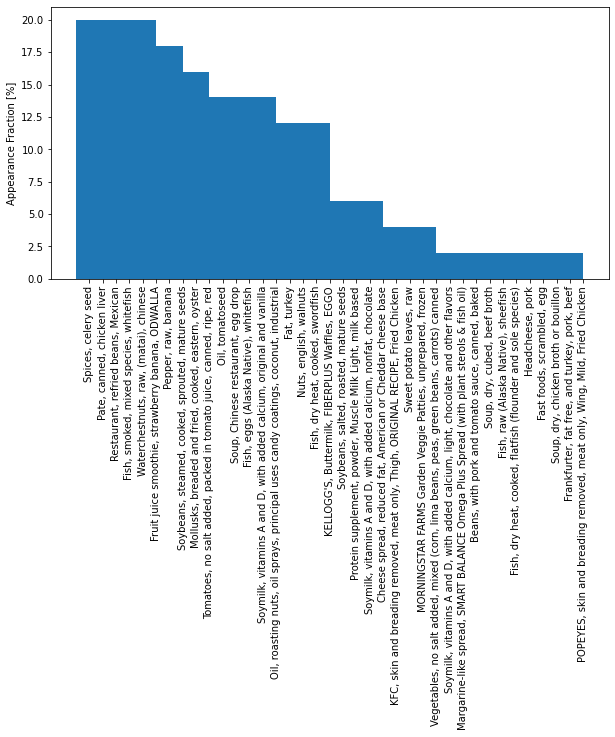

In [35]:
plt.figure(figsize=(10,5))
labels, values = zip(*food_count.most_common())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, [value / 50 * 100 for value in values], width)
plt.xticks(indexes + width * 0.5, labels, rotation='vertical')
plt.ylabel("Appearance Fraction [%]")
plt.show()

Text(0.5, 0, 'Calories [kcal]')

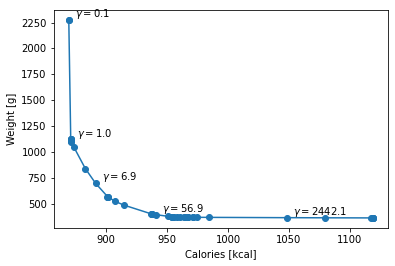

In [148]:
# Pareto frontier
fig, ax = plt.subplots()

ax.plot(cals, weights)
ax.scatter(cals, weights,)
for idx in [0,10,18,27,43]:
    ax.annotate(f"$\gamma = {gamma_vals[idx]:.1f}$",xy=(cals[idx]+5, weights[idx]+30))
ax.set_ylabel('Weight [g]')
ax.set_xlabel('Calories [kcal]')

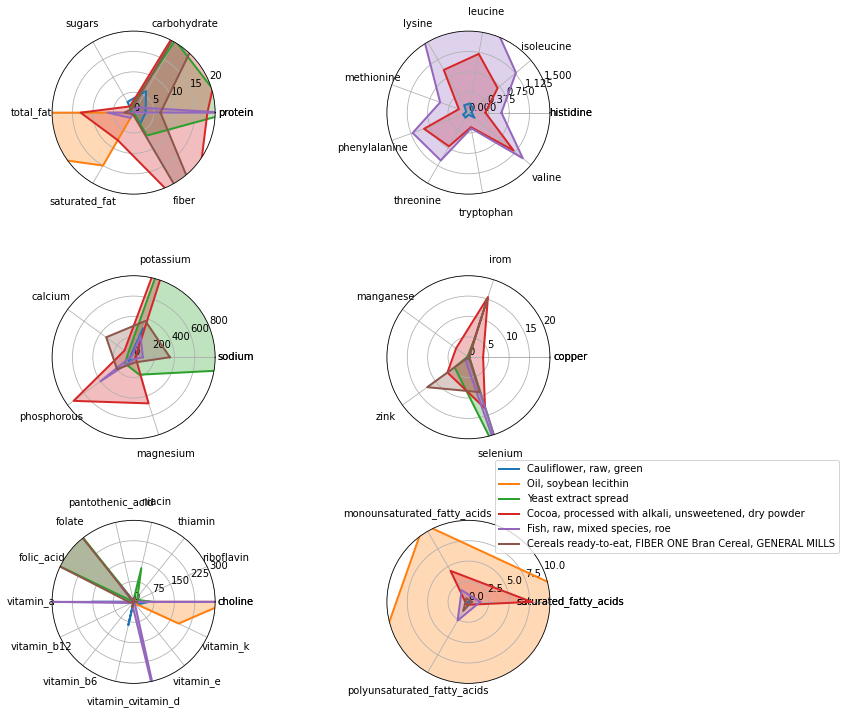

In [178]:
fig, axs = plt.subplots(figsize=(12,12), ncols=2, nrows=3, subplot_kw=dict(polar=True), 
                        gridspec_kw={'wspace': 0.0, 'hspace': 0.5})
axs = axs.flatten()
n_contours = 5
# fig.suptitle(food_name, fontsize=20)

for ax, group, radius in zip(axs,[summary, essential, 
                                  macro_minerals, trace_minerals, 
                                  vitamins, fatty_acids],[20,1.5,800,20,300,10]):
    ax.set_ylim(0,radius)
    ax.set_rgrids(np.linspace(0,radius,n_contours))
    
    for idx in [6,0,1,9,5,13]:
        food_name = final_foods.iloc[idx][0]
        food_index = final_foods.iloc[idx][1]
        weight = final_foods.iloc[idx][2]

        radar_names = df.iloc[food_index][group].index
        radar_vals = df.iloc[food_index][group].values

        label_loc = np.linspace(start=0, stop=2*np.pi, num=len(radar_names) + 1)
        radar_vals = np.append(radar_vals, radar_vals[0])
        radar_names = np.append(radar_names, radar_names[0])

        ax.plot(label_loc, radar_vals, lw=2, label=food_name)
        ax.fill(label_loc, radar_vals, alpha=0.3)

        lines, labels = ax.set_thetagrids(np.degrees(label_loc), labels=radar_names)
    
    ax.tick_params(axis='both', which='major', pad=10, labelsize=10)

        
ax.legend(loc='upper left', bbox_to_anchor=(0.63,1.4))
plt.show()

In [249]:
final = df.values.T @ x3.value
for i, col in enumerate(df.columns):
    print(f"{final[i]:.2f}{units[col]}  {col}")

14125.00kcal  calories
525.00g  total_fat
325.00g  saturated_fat
1375.00mg  cholesterol
39625.00 mg  sodium
1687.50 mg  choline
1000.00 mcg  folate
0.00 mcg  folic_acid
134.00 mg  niacin
58.50 mg  pantothenic_acid
5.12 mg  riboflavin
10.75 mg  thiamin
17250.00 IU  vitamin_a
4750.00 mcg  vitamin_a_rae
0.00 mcg  carotene_alpha
1125.00 mcg  carotene_beta
0.00 mcg  cryptoxanthin_beta
875.00 mcg  lutein_zeaxanthin
8.75 mcg  vitamin_b12
27.75 mg  vitamin_b6
750.00 mg  vitamin_c
1250.00 IU  vitamin_d
15.00 mg  vitamin_e
250.00 mcg  vitamin_k
3000.00 mg  calcium
17.25 mg  copper
32.50 mg  irom
2250.00 mg  magnesium
14.25 mg  manganese
5625.00 mg  phosphorous
35500.00 mg  potassium
100.00 mcg  selenium
33.75 mg  zink
232.50 g  protein
7.25 g  alanine
9.37 g  arginine
46.75 g  aspartic_acid
2.50 g  cystine
41.12 g  glutamic_acid
6.50 g  glycine
5.25 g  histidine
-0.00g  hydroxyproline
10.25 g  isoleucine
15.37 g  leucine
13.25 g  lysine
4.12 g  methionine
10.37 g  phenylalanine
12.62 g  proline


In [57]:
final = df.values.T @ x.value
for i, col in enumerate(df.columns):
    print(f"{final[i]:.2f}{units[col]}  {col}")

1900.00kcal  calories
120.00g  total_fat
25.00g  saturated_fat
250.00mg  cholesterol
1500.00 mg  sodium
550.00 mg  choline
612.20 mcg  folate
400.00 mcg  folic_acid
25.96 mg  niacin
5.00 mg  pantothenic_acid
3.97 mg  riboflavin
3.49 mg  thiamin
4476.97 IU  vitamin_a
1162.03 mcg  vitamin_a_rae
0.00 mcg  carotene_alpha
233.31 mcg  carotene_beta
0.00 mcg  cryptoxanthin_beta
678.25 mcg  lutein_zeaxanthin
5.59 mcg  vitamin_b12
1.30 mg  vitamin_b6
90.00 mg  vitamin_c
600.00 IU  vitamin_d
15.00 mg  vitamin_e
120.00 mcg  vitamin_k
1300.00 mg  calcium
2.66 mg  copper
15.27 mg  irom
500.00 mg  magnesium
2.30 mg  manganese
1465.76 mg  phosphorous
4700.00 mg  potassium
69.34 mcg  selenium
11.96 mg  zink
70.00 g  protein
3.57 g  alanine
3.76 g  arginine
5.92 g  aspartic_acid
0.65 g  cystine
11.82 g  glutamic_acid
3.91 g  glycine
1.74 g  histidine
0.00g  hydroxyproline
3.26 g  isoleucine
5.52 g  leucine
5.08 g  lysine
1.52 g  methionine
2.88 g  phenylalanine
5.20 g  proline
3.17 g  serine
2.77 g  th

In [272]:
l_dual = prob3.constraints[0].dual_value
tol = 1e-6
l_lim = pd.DataFrame([(nutrient, val) for nutrient, val in zip(np.array(l_idxs)[l_dual > tol], l_dual[l_dual > tol])])
print(l_lim)

                   0          1
0           calories   0.000002
1      saturated_fat   0.000002
2        cholesterol   2.491296
3             niacin   0.000009
4   pantothenic_acid   0.000003
5         riboflavin   0.000013
6            thiamin   0.000023
7        vitamin_b12   0.000011
8         vitamin_b6   0.000011
9          vitamin_d   0.667466
10         vitamin_e   0.000005
11         vitamin_k  39.733176
12            copper   0.000012
13              irom   0.000004
14         manganese   0.000005
15          selenium   0.568308
16              zink   0.000008
17           cystine   0.000164
18         histidine   0.000049
19        isoleucine   0.000020
20           leucine   0.000015
21            lysine   0.000017
22        methionine   0.000059
23     phenylalanine   0.000022
24         threonine   0.000027
25        tryptophan   0.000078
26          tyrosine   0.000022
27            valine   0.000021


In [93]:
l_dual = prob.constraints[1].dual_value
tol = 1e-6
l_lim = pd.DataFrame([(nutrient, val) for nutrient, val in zip(np.array(l_idxs)[l_dual > tol], l_dual[l_dual > tol])])
print(l_lim)

             0         1
0     calories  0.002176
1       sodium  0.000015
2      choline  0.000297
3   folic_acid  0.000015
4    vitamin_c  0.000032
5    vitamin_d  0.000010
6    vitamin_e  0.000123
7    vitamin_k  0.000064
8      calcium  0.000074
9    manganese  0.000460
10   potassium  0.000067
11       fiber  0.001647
12       water  0.008779


In [94]:
result = x.value
idxs = np.array([i for i in range(len(result))])
tol = 1e-6
final_foods = pd.DataFrame([(names[food], food, val) for food, val in zip(idxs[result > tol], result[result > tol])])

In [95]:
final_foods.sort_values(by=2,ascending=False)

,0,1,2
13,"Milk, with added vitamin A and vitamin D, regu...",5090,0.639470
5,"Soybeans, raw, mature seeds",853,0.609297
17,"Pork, simmered, cooked, chitterlings, variety ...",6541,0.548811
7,"Potato chips, reduced fat, without salt",1954,0.517495
9,"Oil, high oleic, canola, industrial",2378,0.476247
6,"Frankfurter, low fat, beef",994,0.471681
14,"Cocoa, processed with alkali, hi-fat or breakf...",5185,0.368832
11,"Gums, seed gums (includes locust bean, guar)",2569,0.198783
4,"Fat, chicken",580,0.195035
10,"Vanilla extract, alcohol, imitation",2452,0.151976


In [35]:
for idx in final_foods[1]:
    print(names[idx], df.iloc[idx]['potassium'])

Yeast extract spread 2100.0
Fish oil, cod liver 0.0
Vanilla extract 148.0
Fat, chicken 0.0
Soybeans, raw, mature seeds 1797.0
Frankfurter, low fat, beef 129.0
Snacks, plain, pork skins 127.0
Egg Mix, USDA Commodity 373.0
Potato chips, reduced fat, without salt 1744.0
Formulated Bar, SOUTH BEACH protein bar 793.0
Gums, seed gums (includes locust bean, guar) 0.0
Cereals, dry, plain, original, MALT-O-MEAL 100.0
Cereals ready-to-eat, KELLOGG'S PRODUCT 19, KELLOGG 179.0
Protein supplement, powder, Muscle Milk Light, milk based 840.0
Milk, with added vitamin A and vitamin D, regular, nonfat, dry 1794.0
Formulated bar, all flavors, SNICKERS MARATHON Energy Bar, MARS SNACKFOOD US 351.0
Pork, simmered, cooked, chitterlings, variety meats and by-products, fresh 14.0


In [58]:
for i, v in enumerate(df.iloc[1170].values):
    if v != 0:
        print(df.columns[i], v)

sodium 2.0
calcium 10.0
copper 0.007
magnesium 2.0
ash 0.07
water 99.98


In [37]:
low_lim_sum = []
low_lim_ess = []
low_lim_min = []
for nutrient in summary:
    low, upp = constraints[nutrient]
    low_lim_sum.append(low)
for nutrient in essential:
    low, upp = constraints[nutrient]
    low_lim_ess.append(low)
for nutrient in minerals:
    low, upp = constraints[nutrient]
    low_lim_min.append(low)

In [116]:
idx = 2585
print(df[summary].iloc[idx].sum())

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'polar'},{'type':'polar'},{'type':'polar'}]])

fig.add_trace(go.Scatterpolar(
      r=low_lim_sum + [low_lim_sum[0]],theta=summary + [summary[0]],
      name='lower_lim'
), row=1, col=1)

fig.add_trace(go.Scatterpolar(
      r=df[summary+[summary[0]]].iloc[idx],
      theta=summary+ [summary[0]],
      fill='toself',
      name=names[idx]
), row=1, col=1)

fig.add_trace(go.Scatterpolar(
      r=low_lim_ess + [low_lim_ess[0]],theta=essential + [essential[0]],
      name='lower_lim'
), row=1, col=2)

fig.add_trace(go.Scatterpolar(
      r=df[essential+[essential[0]]].iloc[idx],
      theta=essential+ [essential[0]],
      fill='toself',
      name=names[idx]
), row=1, col=2)

fig.add_trace(go.Scatterpolar(
      r=low_lim_min + [low_lim_min[0]],theta=minerals + [minerals[0]],
      name='lower_lim'
), row=1, col=3)

fig.add_trace(go.Scatterpolar(
      r=df[minerals+[minerals[0]]].iloc[idx],
      theta=minerals+ [minerals[0]],
      fill='toself',
      name=names[idx]
), row=1, col=3)



fig.update_layout(
    height=600, width=1800,
    title=names[idx],
  polar=dict(
    radialaxis=dict(
      visible=True,
#       range=[0, 100]
    )),
  showlegend=False
)

fig.show()

96.7


In [50]:
df[summary].iloc[1954]

protein          7.1
carbohydrate    67.8
total_fat       21.0
water            1.0
Name: 1954, dtype: float64

In [51]:
df[summary].iloc[995]

protein         12.34
carbohydrate    66.36
total_fat       15.00
water            5.05
Name: 995, dtype: float64

In [52]:
df[summary].iloc[994]

protein         12.0
carbohydrate     1.6
total_fat        9.5
water           63.8
Name: 994, dtype: float64

In [74]:
df[(df['protein'] > 0) * (df[amino_acids].sum(axis=1) == 0)][['protein']+amino_acids]

,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine
4,1.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,23.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,19.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8764,0.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8767,1.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8770,1.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8771,3.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
df[(df['protein'] == 0) * (df[amino_acids].sum(axis=1) > 0)][['protein']+amino_acids]

,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine
615,0.0,0.000,0.000,0.002,0.000,0.002,0.000,0.000,0.0,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1221,0.0,0.072,0.088,0.155,0.019,0.234,0.070,0.027,0.0,0.060,0.094,0.078,0.016,0.075,0.067,0.067,0.062,0.023,0.058,0.093
1474,0.0,0.003,0.002,0.003,0.001,0.007,0.001,0.001,0.0,0.001,0.005,0.001,0.001,0.002,0.003,0.002,0.001,0.000,0.001,0.002
2186,0.0,0.036,0.064,0.105,0.014,0.180,0.026,0.031,0.0,0.007,0.017,0.019,0.029,0.017,0.029,0.041,0.024,0.000,0.016,0.024
4438,0.0,0.013,0.007,0.003,0.000,0.017,0.002,0.001,0.0,0.001,0.002,0.002,0.000,0.002,0.002,0.002,0.002,0.000,0.000,0.002
4621,0.0,0.003,0.002,0.003,0.001,0.007,0.001,0.001,0.0,0.001,0.005,0.001,0.001,0.002,0.003,0.002,0.001,0.000,0.001,0.002


In [76]:
complete = df[(df['protein'] > 0) * (df[amino_acids].sum(axis=1) > 0)][['protein']+amino_acids]

In [77]:
amino_median = []
for idx in range(len(amino_acids)):
    ratio = complete[[amino_acids[idx]]].sum(axis=1) / complete['protein']
    amino_median.append(ratio.median())
amino_median = 0.9 * np.array(amino_median)

In [78]:
mask = (df['protein'] > 0) * (df[amino_acids].sum(axis=1) == 0)
fix = df[mask][['protein']].values * amino_median
for idx in range(len(amino_acids)):
    df[amino_acids[idx]][mask] = fix[:,idx]

/var/folders/pj/mh9s37yn0r90tmd44r3slss00000gn/T/ipykernel_27438/715047728.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
#Save amended data
df.to_csv('../data/nutrition_augment.csv', index=False)